In [3]:
import sys
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
import skimage
import matplotlib.pyplot as plt

sys.path.append("XXXX")
from helper import(
    transformImage,
    getImageSpatialCoord,
    Siren
)


In [4]:
class ToyDataset(Dataset):
    def __init__(self, trainPix=128, numDim=2):
        super().__init__()
        img = skimage.data.camera()
        img = transformImage(img, trainPix)
        self.pixels = img.permute(1, 2, 0).view(-1, 1)
        self.coords = getImageSpatialCoord(trainPix, numDim)

    def __len__(self):
        return 1

    def __getitem__(self, idx):    
        if idx > 0: raise IndexError
            
        return self.coords, self.pixels

In [ ]:
model = Siren(2, 1, 100, 3,omegas=[30., 30., 30.])
optim = torch.optim.Adam(lr=1e-3, params=model.parameters())
dataloader = ToyDataset()
dataloader = DataLoader(dataloader, batch_size=1, pin_memory=True, num_workers=0)
x, y = next(iter(dataloader))

In [ ]:
for step in range(1000):
    model_output = model(x)
    loss = ((model_output - y)**2).mean()
    optim.zero_grad()
    loss.backward()
    optim.step()
    print(step, loss.item())


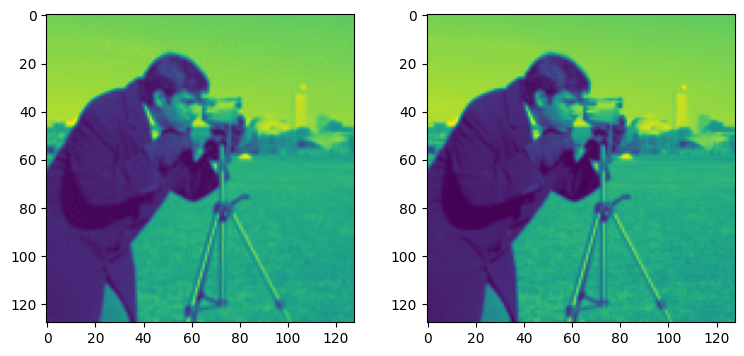

In [9]:
fig, axes = plt.subplots(1,2, figsize=(9,4))
axes[0].imshow(model_output.cpu().view(128,128).detach().numpy())
axes[1].imshow(y.cpu().view(128,128).detach().numpy())

In [ ]:
# TODO: add relu MLP and Forier MLP